In [3]:
# importacion datos ya depurados y organizados
import pandas as pd
!wget https://raw.githubusercontent.com/CodingWithNoDirection/DatosPredictivos1/main/SaleHousesColPreprocesado.csv
df = pd.read_csv('SaleHousesColPreprocesado.csv')

--2023-10-22 22:52:19--  https://raw.githubusercontent.com/CodingWithNoDirection/DatosPredictivos1/main/SaleHousesColPreprocesado.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15263287 (15M) [text/plain]
Saving to: ‘SaleHousesColPreprocesado.csv’

SaleHousesColPrepro 100%[===================>]  14.56M  --.-KB/s    in 0.05s   

2023-10-22 22:52:19 (266 MB/s) - ‘SaleHousesColPreprocesado.csv’ saved [15263287/15263287]



Archivo ya preprocesado

In [ ]:
from scipy import stats
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

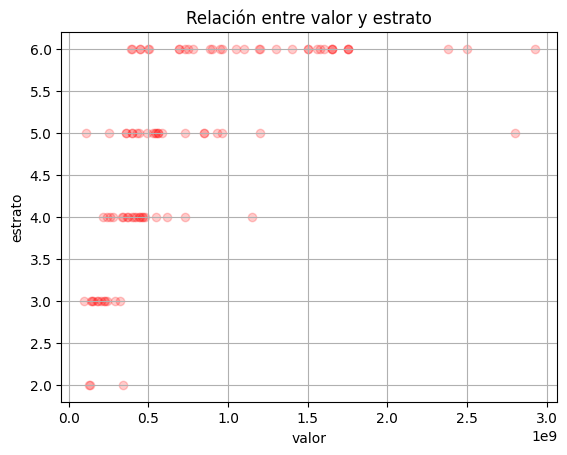

In [6]:
d1 = df['valor'].head(100)
d2 = df['estrato'].head(100)

plt.scatter(d1, d2, color="red", alpha=0.2)  # Crear un gráfico de hexágonos
plt.xlabel('valor')  # Etiqueta del eje x
plt.ylabel('estrato')  # Etiqueta del eje y
plt.title('Relación entre valor y estrato')  # Título del gráfico
plt.grid()
plt.show()


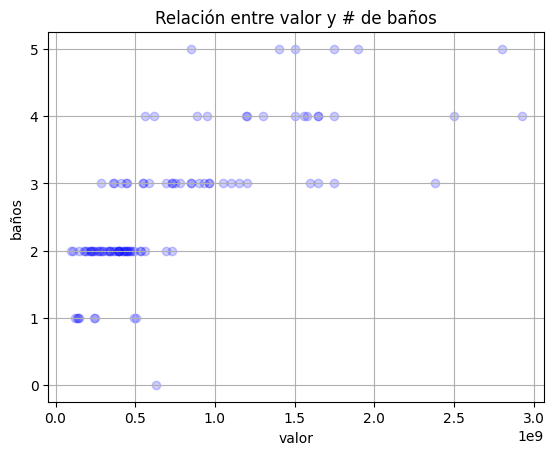

In [7]:
d1 = df['valor'].head(100)
d2 = df['banos'].head(100)

plt.scatter(d1, d2, color="blue", alpha=0.2)  # Crear un gráfico de hexágonos
plt.xlabel('valor')  # Etiqueta del eje x
plt.ylabel('baños')  # Etiqueta del eje y
plt.title('Relación entre valor y # de baños')  # Título del gráfico
plt.grid()
plt.show()


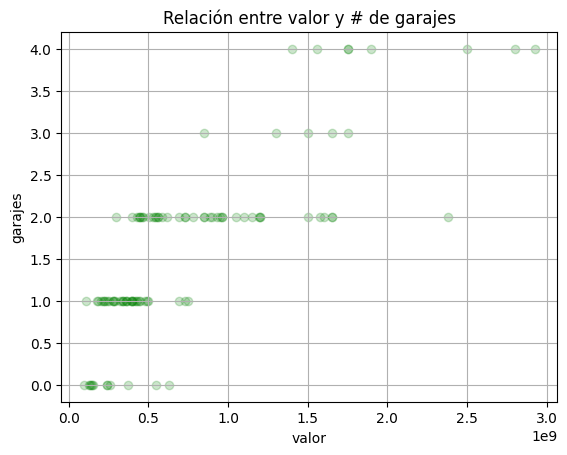

In [16]:
d1 = df['valor'].head(100)
d2 = df['garajes'].head(100)

plt.scatter(d1, d2, color="green", alpha=0.2)  # Crear un gráfico de hexágonos
plt.xlabel('valor')  # Etiqueta del eje x
plt.ylabel('garajes')  # Etiqueta del eje y
plt.title('Relación entre valor y # de garajes')  # Título del gráfico
plt.grid()
plt.show()


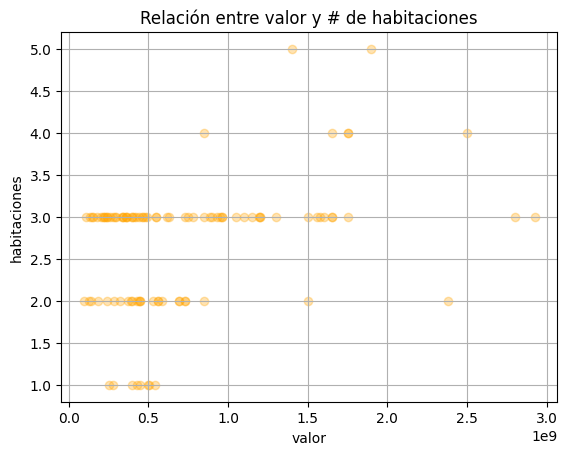

In [19]:
d1 = df['valor'].head(100)
d2 = df['habitaciones'].head(100)

plt.scatter(d1, d2, color="orange", alpha=0.3)  # Crear un gráfico de hexágonos
plt.xlabel('valor')  # Etiqueta del eje x
plt.ylabel('habitaciones')  # Etiqueta del eje y
plt.title('Relación entre valor y # de habitaciones')  # Título del gráfico
plt.grid()
plt.show()


In [35]:
df_null = df[['valor', 'estrato','banos','habitaciones','garajes']].dropna() # se eliminan datos nulls

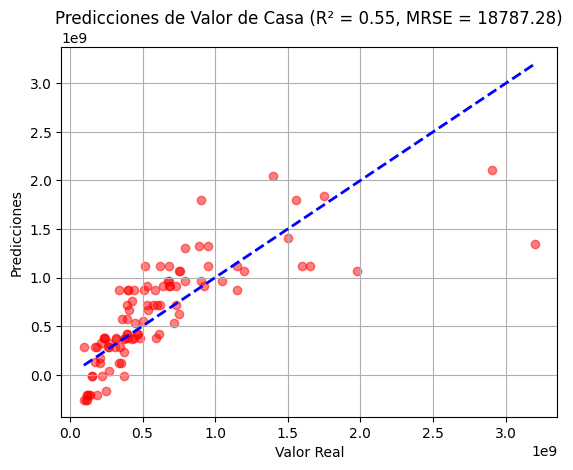

[9.61144373e+08]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [87]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
X = df_null[['banos', 'estrato', 'garajes', 'habitaciones']].head(500)
y = df_null['valor'].head(500)

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de Regresión Lineal Múltiple
mlr_reg = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
mlr_reg.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_preds = mlr_reg.predict(X_test)

# Calcular el coeficiente de determinación R²
r2 = r2_score(y_test, y_preds)
mse = np.sqrt(mean_squared_error(y_test, y_preds))
# Visualizar los datos originales y las predicciones
plt.scatter(y_test, y_preds, color='red', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='blue', linewidth=2)
plt.xlabel('Valor Real')
plt.ylabel('Predicciones')
plt.title(f'Predicciones de Valor de Casa (R² = {r2:.2f}, MRSE = {np.sqrt(mse):.2f})')
plt.grid()
plt.show()

print(mlr_reg.predict([[3,6,2,3]]))


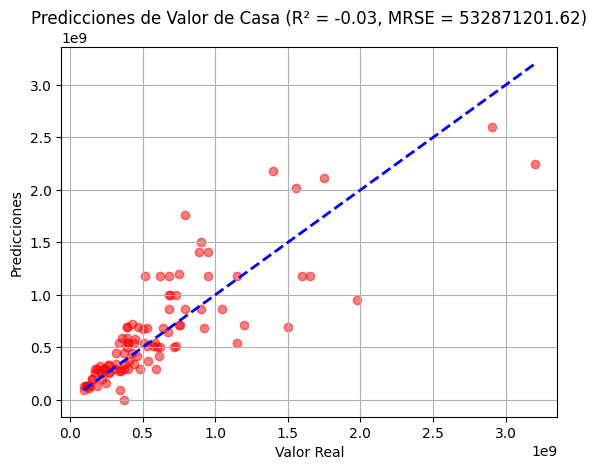

In [112]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
X = df_null[['banos', 'estrato', 'garajes', 'habitaciones']].head(500)
y = df_null['valor'].head(500)

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)

# Ajustar el modelo a los datos de entrenamiento
dt_reg.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_preds = dt_reg.predict(X_test)

# Calcular el coeficiente de determinación R²
#r2 = r2_score(y_test, y_preds)

# Calcular el Mean Squared Error (MSE)
#mse = mean_squared_error(y_test, y_preds)

# Visualizar los datos originales y las predicciones
#plt.scatter(X, y, color='red', alpha=0.5)
plt.scatter(y_test, y_preds, color='red', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='blue', linewidth=2)
plt.xlabel('Valor Real')
plt.ylabel('Predicciones')
plt.title(f'Predicciones de Valor de Casa (R² = {r2:.2f}, MRSE = {np.sqrt(mse):.2f})')
plt.grid()
plt.show()


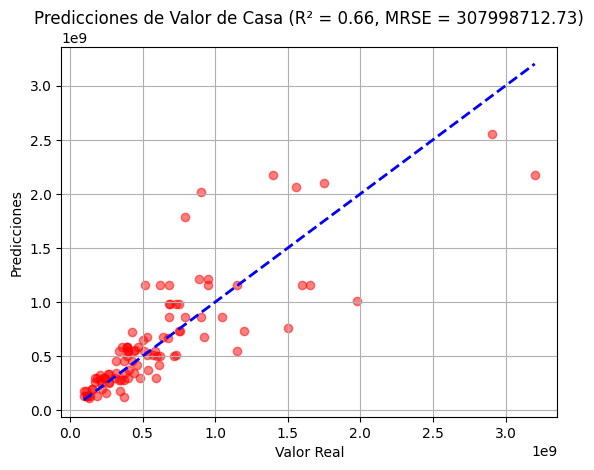

In [115]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
X = df_null[['banos', 'estrato', 'garajes', 'habitaciones']].head(500)
y = df_null['valor'].head(500)

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)

# Ajustar el modelo a los datos de entrenamiento
rf_reg.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_preds = rf_reg.predict(X_test)

# Calcular el coeficiente de determinación R²
r2 = r2_score(y_test, y_preds)

# Calcular el Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_preds)

# Visualizar los datos originales y las predicciones
plt.scatter(y_test, y_preds, color='red', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='blue', linewidth=2)
plt.xlabel('Valor Real')
plt.ylabel('Predicciones')
plt.title(f'Predicciones de Valor de Casa (R² = {r2:.2f}, MRSE = {np.sqrt(mse):.2f})')
plt.grid()
plt.show()
